<a href="https://colab.research.google.com/github/IdKheh/Covid-19_cases/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19
### Wiktoria Dębowska (151874) lab. 8

Zbiór danych został dostarczony przez meksykański rząd. Zawiera on 21 różnych cech dotyczących obserwacji 1 048 576 unikalnych pacjentów. Zbierana była płeć pacjenta, wiek, historia choroby oraz data zgonu, jeśli pacjent zmarł.

Zbiór zawiera informację dotyczącą:
*   płci (1 jeśli kobieta, 2 jeśli mężczyzna)
*   wieku
*   daty śmierci (lub jeśli pacjen przeżył to wpisane jest 9999-99-99
*   wyniku testu na covid (skala od 1-7, gdzie 1-3 oznacza, że pacjent ma covid a gdy jest powyżej 4 to test jest niejednoznaczny lub pacjent nie jest nosicielem covid-19
*   typu pacjenta (1 jeśli pacjent po diagnozie wrócił do domu, 2 jeśli wymagał hospitalizacji
*   chorób takich jak: astma, zapalenie płuc, cukrzyca, nadciśnienie, chorniczne zapalenie płuc, immunosupresji, chorób sercowych lub naczyniowych, przewlekłych chorób nerek oraz innych chorób (1 jeśli ma którąś z tych chorób, 2 - jeśli nie ma)
*   ciąży (1 jeśli jest, 2 jeśli nie jest, w przypadku kobiet, a u mężczyzn wpisane jest 97 i 99 jako brak informacji (tylko kobiety mogą być w ciąży))
*   otyłości (1 jeśli jest, 2 jeśli nie jest)
*   palenia (1-tak, 2- nie)
*   zapalenia płuc (1 jeśli wystąpiło, 2 - jeśli nie).

Link do zbioru danych: https://www.kaggle.com/datasets/meirnizri/covid19-dataset

Poniżej znaduje się kod napisany w R, który wczyta zawartość datasetu oraz przetworzy dane w sposób umożliwiający dalsze poszczególne obliczenia.

In [ ]:
#jeśli będzie uruchamiane to przez internetowego colaba, to trzeba pobrać tą bibliotekę
install.packages("googledrive")
library("googledrive")
#oraz znaleźć odpowieniego zipa z plikiem .csv
#drive_find(n_max = 30)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
temp <- tempfile(fileext = ".zip")
dl <- drive_download(
  as_id("1Th154PAOdjnhLVLatlBj_nYc2YV2f9Wn"), path = temp, overwrite = TRUE)
out <- unzip(temp, exdir = tempdir())
dane <- read.csv(out, sep = ",")


File downloaded:

• CovidData.zip <id: 1Th154PAOdjnhLVLatlBj_nYc2YV2f9Wn>

Saved locally as:

• /tmp/Rtmp6PSOqH/filea52c7291bc.zip



In [ ]:
#pobranie pliku do jupitera na komputerze
getwd()
dane <- read.csv("./CovidData.csv") #plik, który jest pod linkiem do datasetu jest 'Covid Data.csv', a tutaj zmieniłam nazwę usuwająac spację
dane

[1] "/content"

Warning message in file(file, "rt"):
“cannot open file './CovidData.csv': No such file or directory”


ERROR: ignored

In [ ]:
#przetworzenie danych w przystepnej formie dla obliczen oraz przedstawienia danych
#proba kobiet oparta na probie calego badania
  ciaza<-c()
  smierc_kobiety<-c()
  hosp_ciaz_kobieta<-c()
  wiek_kobiety<-c()
  wiek_zmarlych_kobiet <-c()

#proba mezczyzn oparta na probie calego badania
  smierc_mez<-c()
  wiek_mez<-c()
  wiek_zmarlych <-c()
  wiek_zmarlych_mez <-c()

#proba calego badania
  palacz<-c()
  smierc<-c()
  wiek_zmarlych <-c()

  n<-1048575
for(i in 1:n) #uwaga!! wczytywanie danych może chwilę potrwać, nawet do godziny
{
  if(dane$SEX[i]==1){#jesli osoba jest kobieta (tak-1; nie-0)
    if(dane$PREGNANT[i]==1) { #czy jest w ciazy
      if(dane$PATIENT_TYPE[i]==2){hosp_ciaz_kobieta<-append(hosp_ciaz_kobieta,1)}
      else{hosp_ciaz_kobieta<-append(hosp_ciaz_kobieta,0)}
      ciaza<-append(ciaza,1)
    }
    else {ciaza<-append(ciaza,0)
    hosp_ciaz_kobieta<-append(hosp_ciaz_kobieta,0)}

    if(dane$DATE_DIED[i]<'9999-99-99') {smierc_kobiety<-append(smierc_kobiety,1)
    wiek_zmarlych_kobiet<-append(wiek_zmarlych_kobiet,dane$AGE[i])} #czy umarla
    else {smierc_kobiety<-append(smierc_kobiety,0)}

    wiek_kobiety<-append(wiek_kobiety,dane$AGE[i]) #wiek kobiet
  }

  else{ #mezczyzni
    if(dane$DATE_DIED[i]<'9999-99-99') {smierc_mez<-append(smierc_mez,1)
    wiek_zmarlych_mez<-append(wiek_zmarlych_mez,dane$AGE[i])} #czy umarl
    else {smierc_mez<-append(smierc_mez,0)}



    wiek_mez<-append(wiek_mez,dane$AGE[i]) #wiek mezczyzn
  }
  if(dane$DATE_DIED[i]<'9999-99-99') {smierc<-append(smierc,1)
  wiek_zmarlych<-append(wiek_zmarlych,dane$AGE[i])
 } #czy umarl
  else {smierc<-append(smierc,0)}

  if(dane$TOBACCO[i]==1) {palacz<-append(palacz,1)} #czy pali
  else {palacz<-append(palacz,0)}
}

In [ ]:
#przydatna funkcja - rysowanie wykresu do testu Z i T
plot_norm  <- function(z, z_crit) {
    x_max  <- max(3, abs(z))
    x  <- seq(-x_max, x_max, 0.1)
    y  <- dnorm(x)
    plot(x, y, type="l")
    abline(v = z, col="blue", lty=2)
    for (zc in z_crit) {
        if (zc > 0) {
            x_c  <- c(zc, zc, x[x > zc], max(x))
            y_c  <- c(0, dnorm(zc), y[x > zc], 0)
        } else {
            x_c  <- c(min(x), x[x < zc], zc, zc)
            y_c  <- c(0, y[x < zc], dnorm(zc), 0)
        }
        polygon(x_c, y_c, border=NA, col="firebrick1")
    }
}

In [ ]:
#przydatna funkcja - rysowanie wykresu chi^2
plot_chi  <- function(z, z_crit) {
  #create density curve
  curve(dchisq(x, df = 10), from = 0, to = z,main = 'Chi-Square Distribution ',ylab = 'Density',lwd = 2)
  x_vector <- seq(z_crit,z)
  p_vector <- dchisq(x_vector, df = 10)
  abline(v = z, col="blue", lty=2)
  #fill in portion of the density plot from 0 to 40
  polygon(c(x_vector, rev(x_vector)), c(p_vector, rep(0, length(p_vector))),col = adjustcolor('red', alpha=0.3), border = NA)
}

In [ ]:
#obliczanie skośności
skewness <- function(dane){
    moment_centralny(dane,3)/sd(dane)^3
}
moment_centralny<-function(dane, rząd){
  mean((dane-mean(dane))^rząd)
}

# Analiza eksploracyjna
Teraz zajmę się przedstawieniem i analizą pewnych zależności pomiędzy poszczególnymi cechami, a ich wpływem na śmiertelność koronawirusa Covid-19.

In [ ]:
#szereg rozdzielczy wieku chorych kobiet, mężczyzn oraz obu płci
ile_przedzialow<-round(1+3.3*log10(n))

table(cut(wiek_kobiety,ile_przedzialow))
table(cut(wiek_mez,ile_przedzialow))
table(cut(dane$AGE,ile_przedzialow))


(-0.121,5.76]   (5.76,11.5]   (11.5,17.3]     (17.3,23]     (23,28.8] 
         8700          7007         10397         32525         58842 
  (28.8,34.6]   (34.6,40.3]   (40.3,46.1]   (46.1,51.9]   (51.9,57.6] 
        78639         74598         67997         53375         48520 
  (57.6,63.4]   (63.4,69.1]   (69.1,74.9]   (74.9,80.7]   (80.7,86.4] 
        32712         20787         11815          9761          5797 
  (86.4,92.2]     (92.2,98]      (98,104]     (104,109]     (109,115] 
         2688           685           188            19             4 
    (115,121] 
            8 


(-0.12,5.71]  (5.71,11.4]  (11.4,17.1]  (17.1,22.9]  (22.9,28.6]  (28.6,34.3] 
       10571         7626        10103        22850        60422        73794 
   (34.3,40]    (40,45.7]  (45.7,51.4]  (51.4,57.1]  (57.1,62.9]  (62.9,68.6] 
       71453        55129        62078        49988        32282        27298 
 (68.6,74.3]    (74.3,80]    (80,85.7]  (85.7,91.4]  (91.4,97.1]   (97.1,103] 
       18145        11877         5732         3176          788          146 
   (103,109]    (109,114]    (114,120] 
          33           11            9 


(-0.121,5.76]   (5.76,11.5]   (11.5,17.3]     (17.3,23]     (23,28.8] 
        19271         14633         20500         62495        112144 
  (28.8,34.6]   (34.6,40.3]   (40.3,46.1]   (46.1,51.9]   (51.9,57.6] 
       152433        146051        134299        104280         98508 
  (57.6,63.4]   (63.4,69.1]   (69.1,74.9]   (74.9,80.7]   (80.7,86.4] 
        70325         46219         26495         21638         12275 
  (86.4,92.2]     (92.2,98]      (98,104]     (104,109]     (109,115] 
         5333          1258           345            45            12 
    (115,121] 
           16 

Jak możemy zauważyć na powyższym szeregu najwięcej ludzi zachorowało w przedziale wiekowym (24,36] lat, co oznacza, że objęci ryzykiem byli ci co osiągnęli wiek pracowniczy, podobną ilość chociaż nieco niższą ma przedział (36,48] lat.

Jednak co zobaczymy na poniższym histogramie najwięcej osób zmarło w wieku (55,65] lat. Co ciekawe na można dostrzec różnicę w gęstości histogramu śmiertelności wśród płci, ponieważ z zebranej próby wynika, że zmarło 1.81 razy więcej mężczyzn niż kobiet.

Wiek śmieci oraz zachorowań wśród obu płci był oparty o całą próbę, natomiast wiek mężczyzn był brany tylko dla wszystkich mężczyzn z próby. Podobnie dla kobiet.

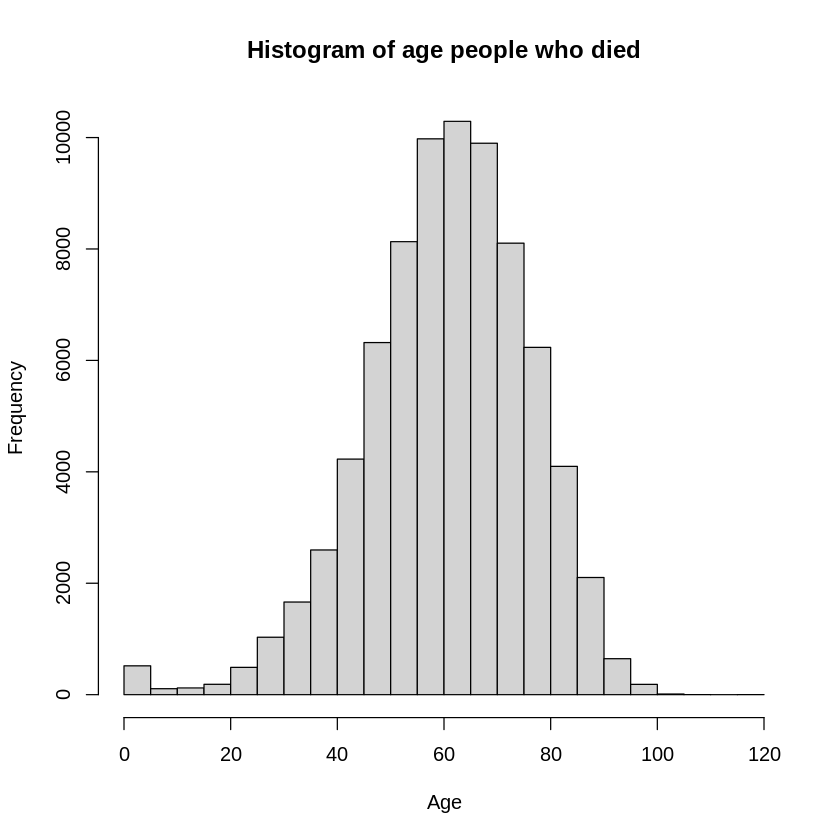

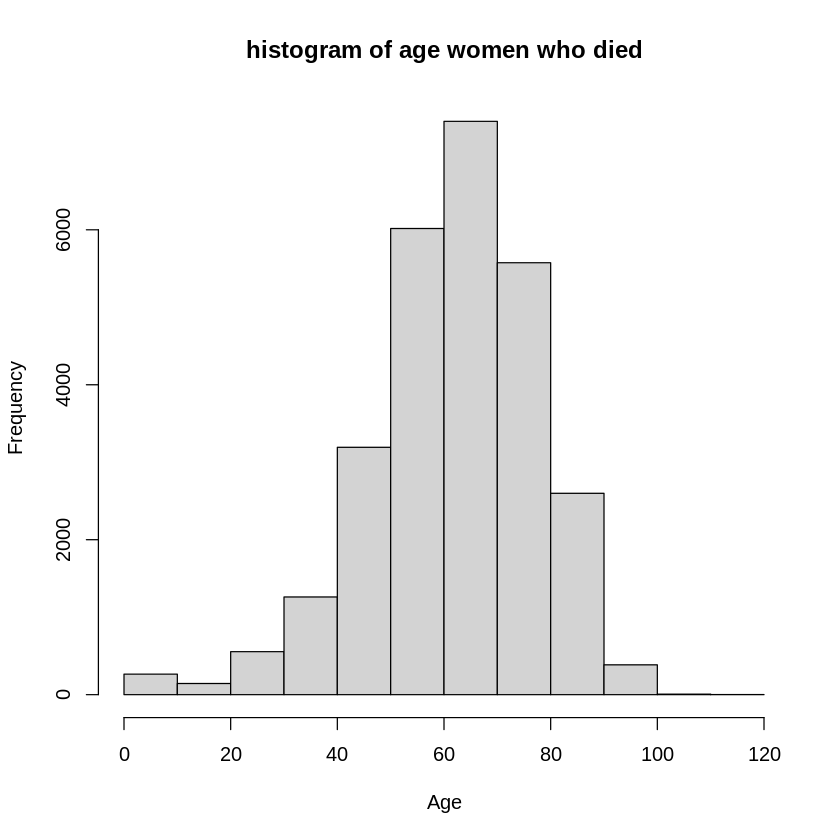

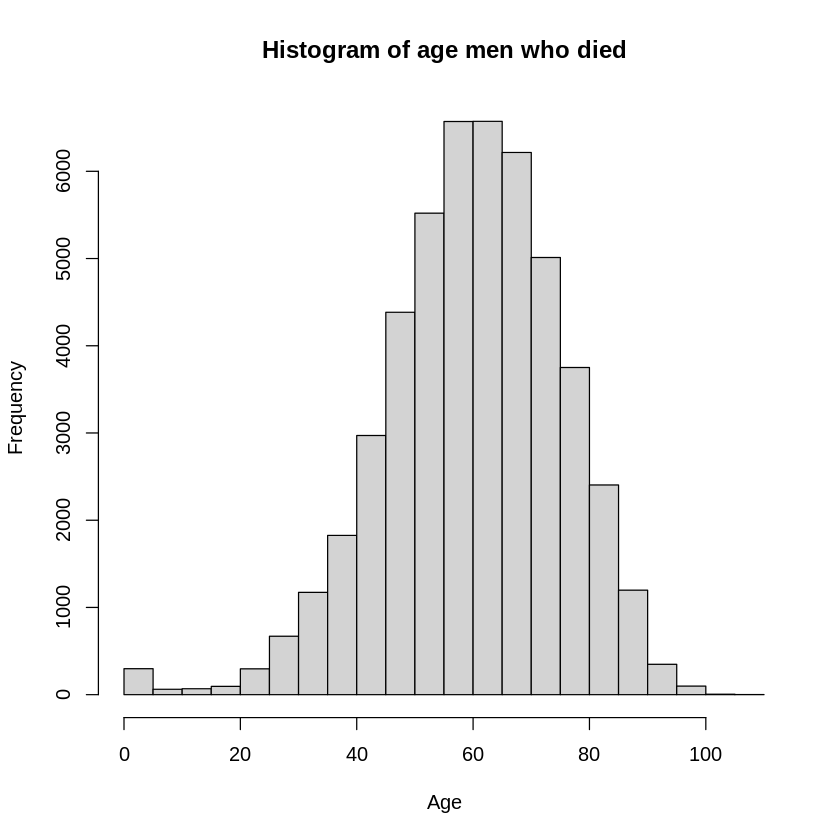

In [ ]:
#histogram pokazujący wiek osób, które zmarły
hist(wiek_zmarlych,main = paste("Histogram of age people who died"),xlab=paste("Age"))
hist(wiek_zmarlych_kobiet,main = paste("histogram of age women who died"),xlab=paste("Age"))
hist(wiek_zmarlych_mez,main = paste("Histogram of age men who died"),xlab=paste("Age"))

In [ ]:
#stosunek smierci mężczyzn do kobiet
paste("Stosunek śmierci mężczyzn do kobiet wynosi: ",round(sum(smierc_mez)/sum(smierc_kobiety),3))

[1] "Stosunek śmierci mężczyzn do kobiet wynosi:  1.808"

Zbierane były również dane na temat ciąż kobiet. Zbadałam więc korelację odnośnie kobiet w ciąży oraz ich śmiertelności względem innych kobiet. Dane wykazały bardzo słaby, a nawet pomijalny związek na poziomie cor = -0.023.

Natomiast istnieje korelacja pomiędzy hospitalizacją a ciążą. Wynik badania pokazuje średnią korelację (cor = 0.49). (Ta korelacja została zbadana na całej próbie tylko ciężarnych kobiet)

In [ ]:
# Poniższy kod dotyczy całej próbki kobiet z całej próby jaką posiadam tj. 525064 kobietami
paste("Kobiety w ciąży a umieralność na covid: ",round(cor(ciaza,hosp_ciaz_kobieta),3)) #tutaj mozna test zrobic

[1] "Kobiety w ciąży a umieralność na covid:  0.49"

Najczęściej umierającymi osobami były osoby z przedziału od 25 lat do 90, co możemy zobaczyć na poniższym wykresie.


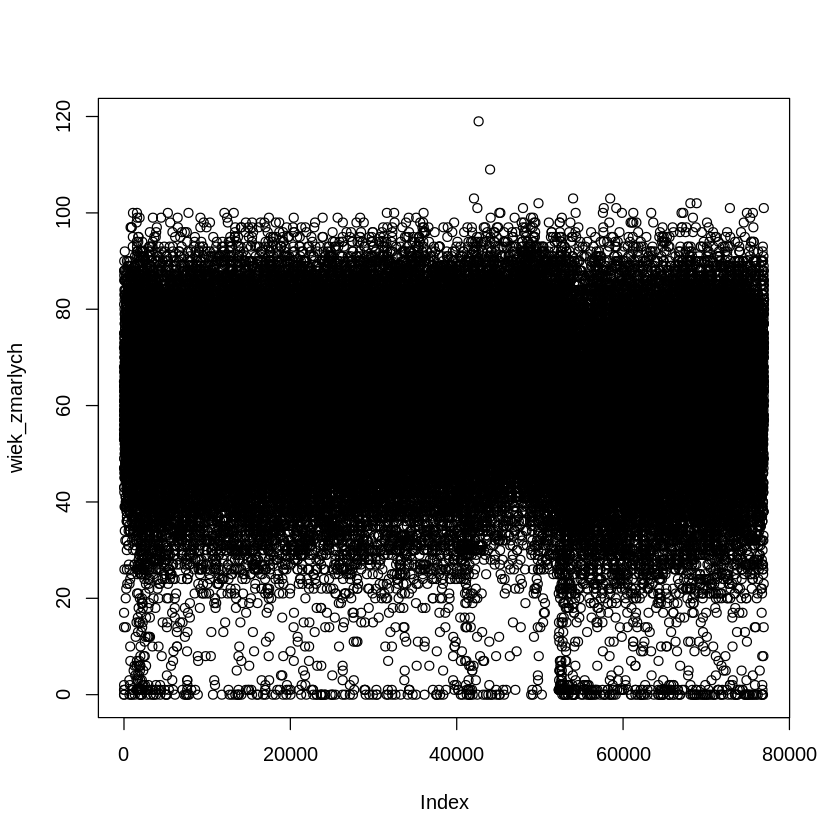

In [ ]:
plot(wiek_zmarlych)

# Test statystyczny
W tej sekcji będę testować powyższe dane. Czy mają one sens oraz czy zgadzają się z wiedzą jaką znalazłam w internecie.


### Test statystyczny dotyczący podwyższonej śmiertelności wśród mężczyzn


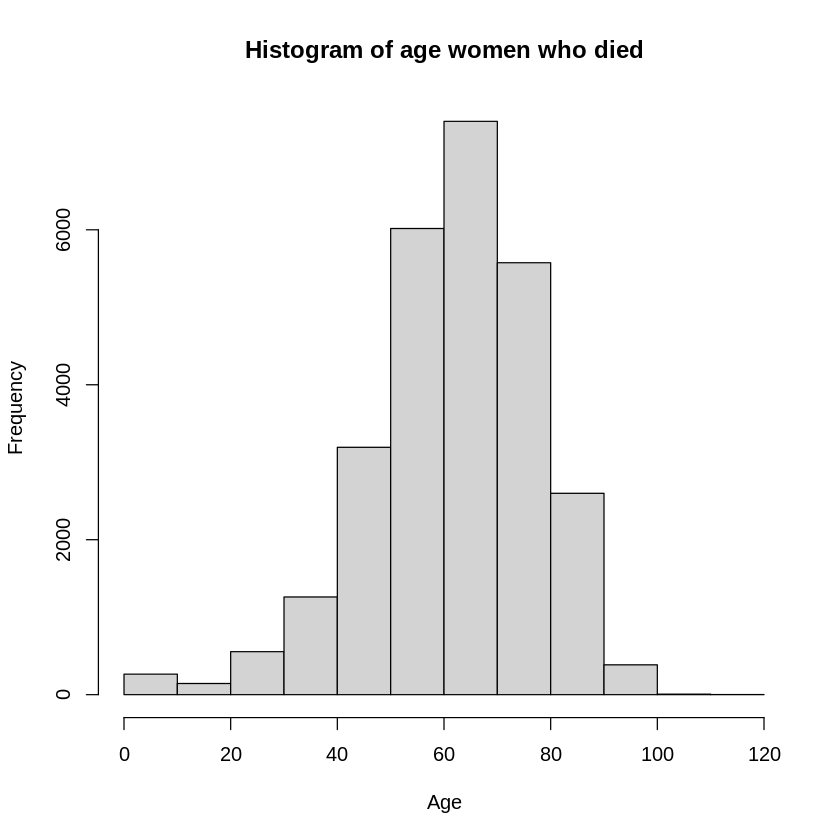

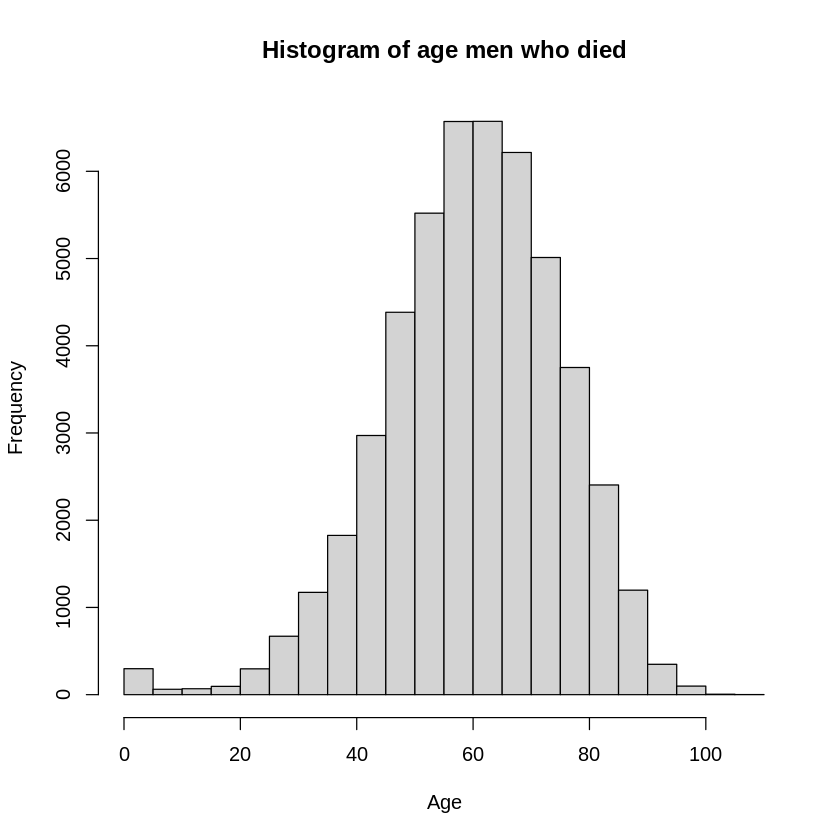

In [ ]:
hist(wiek_zmarlych_kobiet,main = paste("Histogram of age women who died"),xlab=paste("Age"))
hist(wiek_zmarlych_mez,main = paste("Histogram of age men who died"),xlab=paste("Age"))

In [ ]:
paste("Skośność dla histogramu odnośnie wieku zmarłych kobiet: ",round(skewness(wiek_zmarlych_kobiet),3))
paste("Skośność dla histogramu odnośnie wieku zmarłych mężczyzn: ",round(skewness(wiek_zmarlych_mez),3))

[1] "Skośność dla histogramu odnośnie wieku zmarłych kobiet:  -0.753"

[1] "Skośność dla histogramu odnośnie wieku zmarłych mężczyzn:  -0.534"

Jak możemy zauważyć rozkład wieku wśród kobiet i mężczyzn jest zcentralizowany i przypomina rozkład normalny, którym przybliżymy potem go przybliżymy, a następnie obliczymy statystykę.

H0: Umieralność wśród mężczyzn jest taka sama jak kobiet.

H1: Umieralność wśród mężczyzn jest wyższa niż u kobiet.

Teraz wykonam test jednostronny Z dla próbki niesparowanej

[1] "Wartość statystyki:  16.31"

[1] "Obszar krytyczny:  1.645"

[1] "p-value:  4.21990861104025e-60"

[1] "czy możemy odrzucić H0?"


[1] TRUE

[1] TRUE

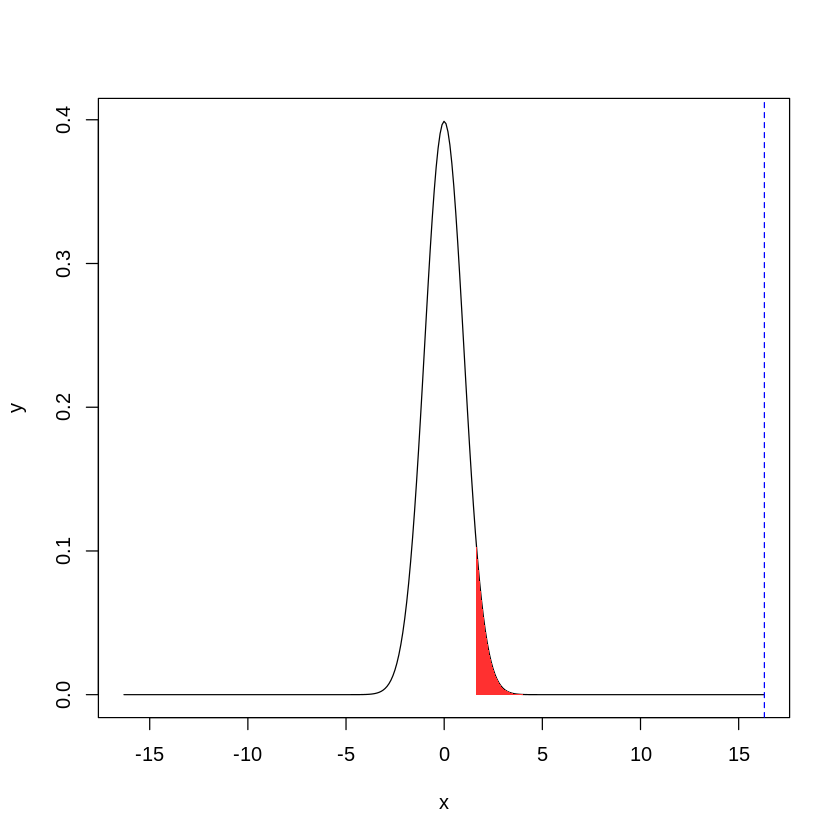

In [ ]:
A <- wiek_zmarlych_kobiet
B <- wiek_zmarlych_mez
n1 <- length(A)
n2 <- length(B)
m1 <- mean(A)
m2 <- mean(B)
s1 <- sd(A)
s2 <- sd(B)
var1<-s1^2
var2<-s2^2
alpha <- 0.05
# H0: m1 = m2, H1: m1 ? m2
Z <- abs(m1-m2)/sqrt(var1/n1 + var2/n2)
zcrta <- qnorm(1-alpha)
p <- pnorm(-abs(Z))
paste("Wartość statystyki: ",round(Z,2))
paste("Obszar krytyczny: ",round(zcrta,3))
paste("p-value: ",p)
print("czy możemy odrzucić H0?")
abs(Z) > abs(zcrta)
p < alpha

plot_norm(Z, zcrta) #prawostronny

Wniosek:

Odrzucamy H0 i przyjmujemy H1. Co oznacza, że mężczyźni częściej umierali z powodu Covid-19. Co zgadza się z tym artykułem znalezionym w Internecie.

Link do artykułu: https://www.medonet.pl/koronawirus,kto-czesciej-umiera-na-covid-19--plec-ma-znaczenie,artykul,37742640.html

### Palenie powodowało wzrost śmiertelności
W pewnym artykule znalazłam informację, że palenie powodowało wzrost ryzyka śmierci o 45%

H0: Covid i palenie nie są zmiennymi zależnymi.

H1: Covid i palenie są zmiennymi zależnymi.

Przeprowadzę test dwóch zmiennych niezależnych.
Artykuł: https://dentonet.pl/wyzsze-ryzyko-smierci-palaczy-na-covid-19-potwierdzone/#gref

,0,1
0,893448.32,78184.685
1,70750.68,6191.315


      palacz
smierc      0      1
     0 893853  77780
     1  70346   6596

[1] "Wartość statystyki:  30.968"

[1] "Obszar krytyczny:  3.841"

[1] "p-value:  2.62373338057944e-08"

[1] "czy możemy odrzucić H0?"


X-squared 
     TRUE

[1] TRUE

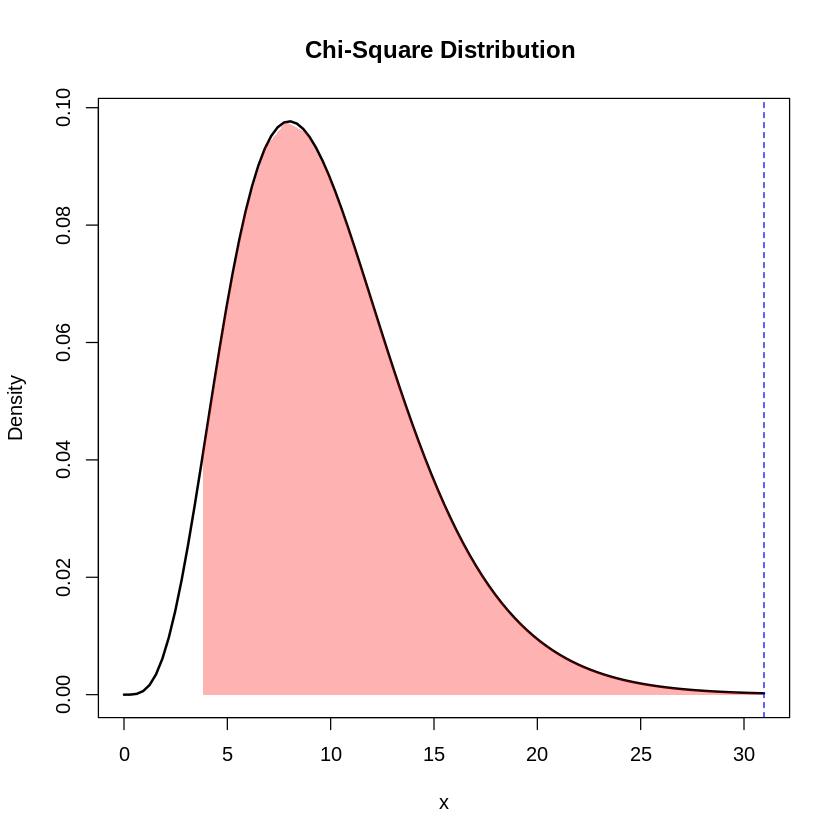

In [ ]:
tab<-table(smierc,palacz)
alpha<-0.05
wynik<-chisq.test(tab)
wynik$expected
wynik$observed

chi_crit<-qchisq(p = alpha, df = 2-1, lower.tail = FALSE)

paste("Wartość statystyki: ",round(wynik$statistic,3))
paste("Obszar krytyczny: ",round(chi_crit,3))
paste("p-value: ",wynik$p.value)

print("czy możemy odrzucić H0?")
abs(wynik$statistic) > abs(chi_crit)
wynik$p.value < alpha

plot_chi(wynik$statistic,chi_crit)

Wniosek:

Odrzucamy H0 i przyjmujemy H1. Oznacza to, że faktycznie ryzyko śmieci z powodu koronawirusa rośnie.

#Wnioski końcowe
Na śmiertelność miało wpływu wiele innych zależności i zmiennych, których nie opisałam tutaj, takie jak choroby serca, otyłość, cukrzyca czy choroby związane z układem odechowym. Testy te możnaby przeprowadzić testem chi^2, myślę jednak, że przybliżyłam i zbadałam ciekawsze aspekty wybranego datasetu.

Co możnaby jeszcze zrobić:
*   pokazać zależność umieralności i wieku
*   pokazać zależność pomiędzy zgonami, a chorobami pacjentów.

